In [3]:
#Importing pandas Libraries for the dataframe
import pandas as pd

In [4]:
train = pd.read_csv("../Datasets/Train.csv")
train_shape = train.shape

test = pd.read_csv("../Datasets/Test.csv")
test_shape = test.shape

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
#Importing Matplotlib for plotting and visualization
import matplotlib.pyplot as plt

#pivot_table function for classification on the basis of sex
sex_pivot = train.pivot_table(index = "Sex", values = "Survived")
sex_pivot.plot.bar()
plt.show()

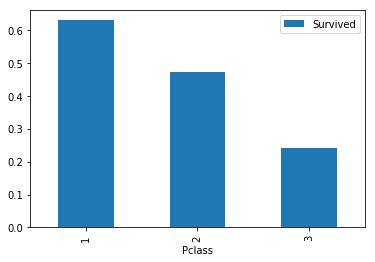

In [8]:
#doing the above visualizastion of Pclass
pclass_pivot = train.pivot_table(index = "Pclass" , values = "Survived")
pclass_pivot.plot.bar()
plt.show()

#Poor Rich folks

In [9]:
#Let us take a closer look at age too
train["Age"].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

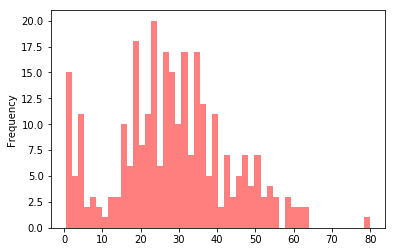

In [10]:
#Histogram of people who survived by age
survived = train[train["Survived"] == 1]
survived["Age"].plot.hist(alpha = 0.5, color = "red", bins = 50)

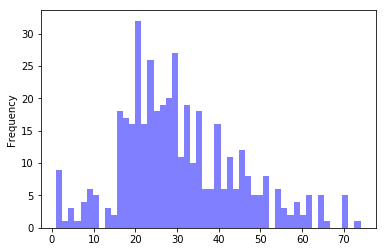

In [11]:
#Histogram of people who died by age
dead = train[train["Survived"] == 0]
dead["Age"].plot.hist(alpha = 0.5, color = "blue", bins = 50)

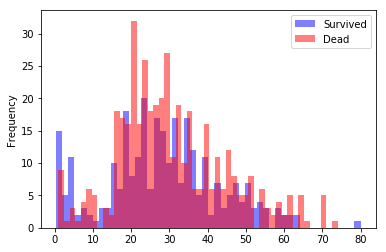

In [12]:
#plotting them together
survived["Age"].plot.hist(alpha = 0.5,color = 'blue', bins = 50)
dead["Age"].plot.hist(alpha = 0.5, color = 'red', bins = 50)
plt.legend(["Survived","Dead"])
plt.show()

In [13]:
#Create a function to process the Age column to different catagories
def process_age(df, cut_points, label_names):
    #using pandas.fillna() method to fill all the missing values with -0.5
    df["Age"] = df["Age"].fillna(-0.5)
    #Cut the age column with pandas.cut()
    df["Age_categories"] = pd.cut(df["Age"], cut_points, labels = label_names)
    return df

In [14]:
#Cut the Age column into seven segments: Missing from -1 to 0 Infant, from 0 to 5 child , from 5 to 12 teenager, from 12 to 18
#12 to 18 young adult, from 18 to 35 Adult, from 35 to 60 Senior, from 60 to 100 Old

cut_points = [-1, 0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", "Infant", "Child", "Teenager", "Young Adult", "Adult", "Senior"]

train = process_age(train, cut_points, label_names)
test = process_age(test, cut_points, label_names)

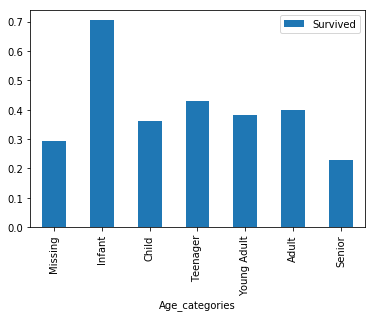

In [15]:
# Use the pivot_tabels() function to plot with Age_categories column
age_categories_pivot = train.pivot_table(index = "Age_categories", values = "Survived")
age_categories_pivot.plot.bar()
plt.show()

In [16]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
#Get_dummies() function will generate column for us
def create_dummies(df, column_name):
    dummies = pd.get_dummies(df[column_name],prefix = column_name)
    df = pd.concat([df,dummies], axis = 1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1,0,0,1


In [19]:
train = create_dummies(train, "Sex")
test = create_dummies(test,"Sex")

train = create_dummies(train, "Age_categories")
test = create_dummies(train, "Age_categories")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


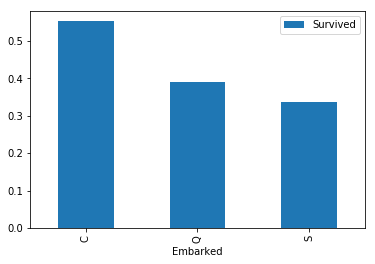

In [20]:
#Calling the pivot_table for Embarked
embarked_pivot = train.pivot_table(index = "Embarked", values = "Survived")
embarked_pivot.plot.bar()
plt.show()

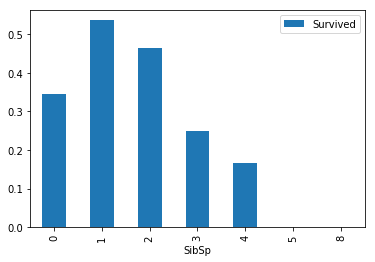

In [23]:
#Calling the pivot_table for Sibsp
SsbSp_pivot = train.pivot_table(index = "SibSp",values = "Survived")
SsbSp_pivot.plot.bar()
plt.show()

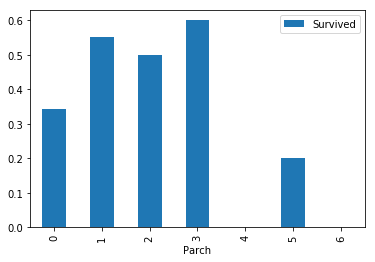

In [25]:
#Calling the pivot_table() function for parch
parch_pivot = train.pivot_table(index = "Parch", values = "Survived")
parch_pivot.plot.bar()
plt.show()

In [27]:
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'Age_categories', u'Pclass_1', u'Pclass_2', u'Pclass_3', u'Pclass_1',
       u'Pclass_2', u'Pclass_3', u'Sex_female', u'Sex_male',
       u'Age_categories_Missing', u'Age_categories_Infant',
       u'Age_categories_Child', u'Age_categories_Teenager',
       u'Age_categories_Young Adult', u'Age_categories_Adult',
       u'Age_categories_Senior'],
      dtype='object')

In [28]:
columns = ["SibSp", "Parch", "Fare", "Cabin", "Embarked"]
train[columns].describe(include = "all", percentiles = [])

,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,NaN,147,3
top,NaN,NaN,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,4,644
mean,0.523008,0.381594,32.204208,NaN,NaN
std,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,14.454200,NaN,NaN
max,8.000000,6.000000,512.329200,NaN,NaN


In [31]:
#checking the details with the test data
test[columns].describe(include = "all", percentiles = [])

,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,NaN,147,3
top,NaN,NaN,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,4,644
mean,0.523008,0.381594,32.204208,NaN,NaN
std,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,0.000000,0.000000,NaN,NaN
50%,0.000000,0.000000,14.454200,NaN,NaN
max,8.000000,6.000000,512.329200,NaN,NaN


In [32]:
#Fare column has a missing value, we will replace the missing value withn the mean
test["Fare"] = test["Fare"].fillna(train["Fare"].mean)
test["Fare"].count()

891